### 1. Load the dataset of sentiment140.csv into memory

In [1]:
import pandas as pd
import numpy as np
sentiment_data = pd.read_csv('/Users/mj/Desktop/DSCI 314 (Text Mining)/StudentSentiment.csv', encoding='ISO-8859-1', 
                             header = None,
                             names = ['polarity', 'ids', 'date', 'flag', 'user', 'text'])
# Reducing size of dataset
sentiment_data = sentiment_data.sample(frac = 0.01)
sentiment_data.head(10)

,polarity,ids,date,flag,user,text
246174,0,1982181752,Sun May 31 10:41:31 PDT 2009,NO_QUERY,lissalue,Feels like poop today its really not fun..
1181792,4,1982149517,Sun May 31 10:37:37 PDT 2009,NO_QUERY,ShannonBaxter,"@MalloryBrasher Aww, I LOVE YOU TOO MALLORY!"
567011,0,2207037832,Wed Jun 17 07:24:02 PDT 2009,NO_QUERY,SotongPrincess,Really gotta sleep early! been oversleeping...
1076466,4,1967438518,Fri May 29 19:34:51 PDT 2009,NO_QUERY,SheriRocks,@DMakaGAMBLE
822439,4,1554526627,Sat Apr 18 17:14:19 PDT 2009,NO_QUERY,brinalovesjoe,@officialFrancia lol hi! I love Secret Life. Y...
1463200,4,2064107864,Sun Jun 07 05:14:56 PDT 2009,NO_QUERY,NicolaWilts,"@KevinSpacey ThatÂ´s cool , that is the answer..."
232340,0,1979149353,Sun May 31 01:50:16 PDT 2009,NO_QUERY,teznic2007,Another gorgeous day. I may have a go at the g...
530161,0,2195802000,Tue Jun 16 11:37:23 PDT 2009,NO_QUERY,lvturner,also realized I microwaved this burger for 3 m...
408169,0,2059345074,Sat Jun 06 16:44:43 PDT 2009,NO_QUERY,wendilynnmakeup,Still don't understand why some pics post out ...
637749,0,2234271741,Thu Jun 18 22:44:30 PDT 2009,NO_QUERY,iammykei,@lalalalaurynn I know I'm horrible at keeping...


### 2. Clean and preprocess the texts

In [2]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

def clean_text(sentence):
    # Remove nan, @airline, punctuation, URL, or any non alpanumeric characters and seperate word using a single space.
    sentence = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence).split())
    # Removing stop words and obtain the lemma
    text = [ word for word in sentence.split() if word not in stopwords.words('english')]
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    return ' '.join(text).strip()

# Add column containing the cleaned twitter text
sentiment_data['text_cleaned'] = sentiment_data['text'].apply(clean_text)
sentiment_data.head()

,polarity,ids,date,flag,user,text,text_cleaned
246174,0,1982181752,Sun May 31 10:41:31 PDT 2009,NO_QUERY,lissalue,Feels like poop today its really not fun..,Feels like poop today really fun
1181792,4,1982149517,Sun May 31 10:37:37 PDT 2009,NO_QUERY,ShannonBaxter,"@MalloryBrasher Aww, I LOVE YOU TOO MALLORY!",Aww I LOVE YOU TOO MALLORY
567011,0,2207037832,Wed Jun 17 07:24:02 PDT 2009,NO_QUERY,SotongPrincess,Really gotta sleep early! been oversleeping...,Really gotta sleep early oversleeping
1076466,4,1967438518,Fri May 29 19:34:51 PDT 2009,NO_QUERY,SheriRocks,@DMakaGAMBLE,
822439,4,1554526627,Sat Apr 18 17:14:19 PDT 2009,NO_QUERY,brinalovesjoe,@officialFrancia lol hi! I love Secret Life. Y...,lol hi I love Secret Life You amazing actress


### 3. Graphically summarize the polarity of the tweet

In [3]:
# First showing polarity proportions/values, 0 = negative, 4 = positive
sentiment_data['polarity'].value_counts(normalize = True)

polarity
4    0.501437
0    0.498563
Name: proportion, dtype: float64

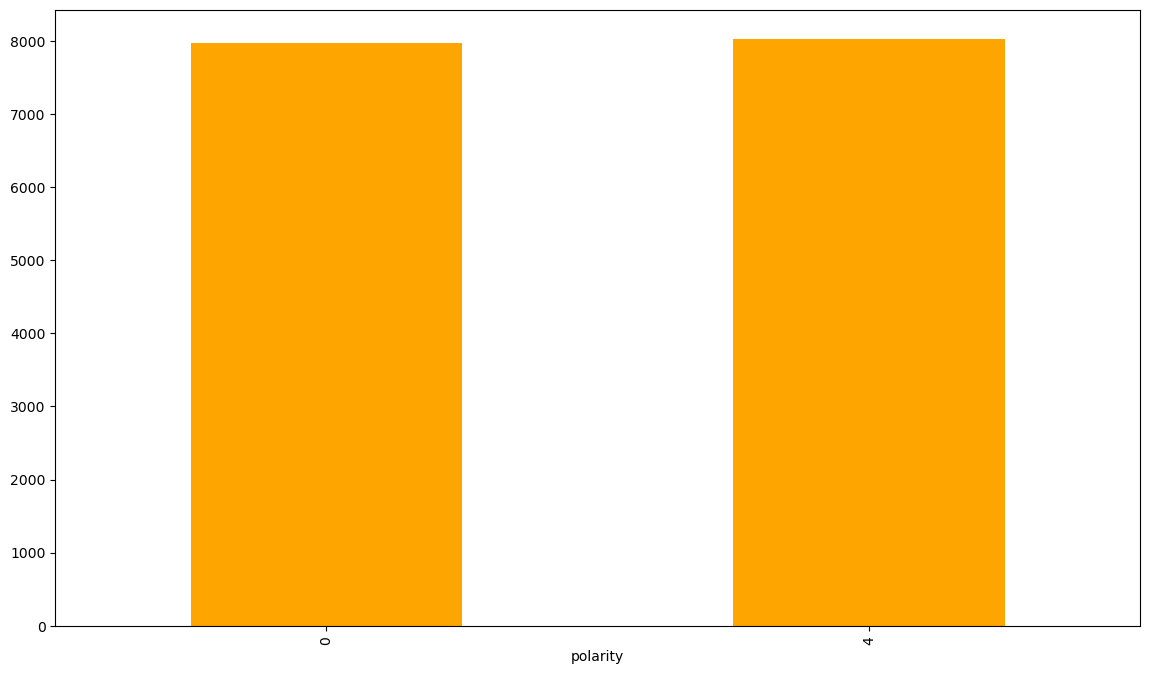

In [4]:
# Boxplot to visually demonstrate polarity values, which are almost 50/50
x = sentiment_data.polarity.value_counts().sort_values().plot(kind = 'bar', 
                                                              figsize=(14,8),
                                                              color = 'orange')

### 4. Graphically summarize the length of the text of the tweet

In [5]:
# Creating column containing length of texts for original tweets and cleaned tweets
sentiment_data["len_text_bc"] = sentiment_data["text"].str.len()
sentiment_data["len_text_ac"] = sentiment_data["text_cleaned"].str.len()

sentiment_data.head()

,polarity,ids,date,flag,user,text,text_cleaned,len_text_bc,len_text_ac
246174,0,1982181752,Sun May 31 10:41:31 PDT 2009,NO_QUERY,lissalue,Feels like poop today its really not fun..,Feels like poop today really fun,43,32
1181792,4,1982149517,Sun May 31 10:37:37 PDT 2009,NO_QUERY,ShannonBaxter,"@MalloryBrasher Aww, I LOVE YOU TOO MALLORY!",Aww I LOVE YOU TOO MALLORY,45,26
567011,0,2207037832,Wed Jun 17 07:24:02 PDT 2009,NO_QUERY,SotongPrincess,Really gotta sleep early! been oversleeping...,Really gotta sleep early oversleeping,47,37
1076466,4,1967438518,Fri May 29 19:34:51 PDT 2009,NO_QUERY,SheriRocks,@DMakaGAMBLE,,13,0
822439,4,1554526627,Sat Apr 18 17:14:19 PDT 2009,NO_QUERY,brinalovesjoe,@officialFrancia lol hi! I love Secret Life. Y...,lol hi I love Secret Life You amazing actress,72,45


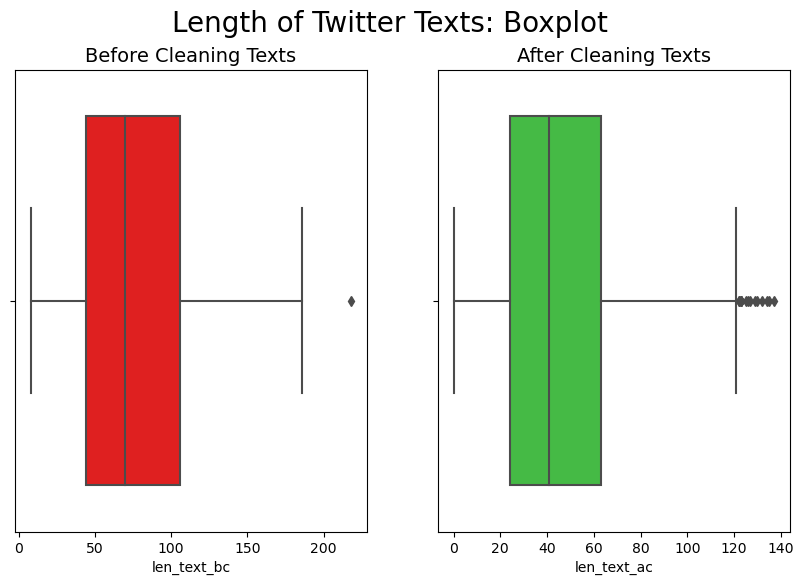

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

boxtextlength, axes = plt.subplots(1, 2, figsize = (10, 6))
boxtextlength.suptitle('Length of Twitter Texts: Boxplot', fontsize= 20)

# Boxplot of tweets before cleaning
sns.boxplot(ax = axes[0], x = sentiment_data["len_text_bc"], color = 'red')
axes[0].set_title("Before Cleaning Texts", fontsize= 14)

# Boxplot of tweets after cleaning
sns.boxplot(ax = axes[1], x = sentiment_data["len_text_ac"], color = 'limegreen')
x = axes[1].set_title("After Cleaning Texts", fontsize= 14)

/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


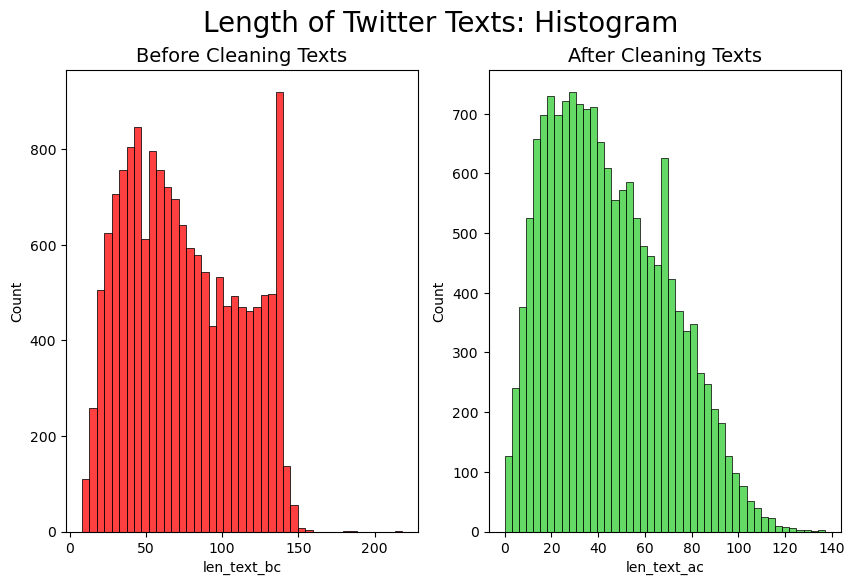

In [7]:
histtextlength, axes = plt.subplots(1, 2, figsize = (10, 6))
histtextlength.suptitle('Length of Twitter Texts: Histogram', fontsize= 20)

# Histogram of tweets before cleaning
sns.histplot(ax = axes[0], data = sentiment_data, x = "len_text_bc", color = 'red')
axes[0].set_title("Before Cleaning Texts", fontsize = 14)

# Histogram of tweets after cleaning
sns.histplot(ax = axes[1], data = sentiment_data, x = "len_text_ac", color = 'limegreen')
x = axes[1].set_title("After Cleaning Texts", fontsize = 14)

/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


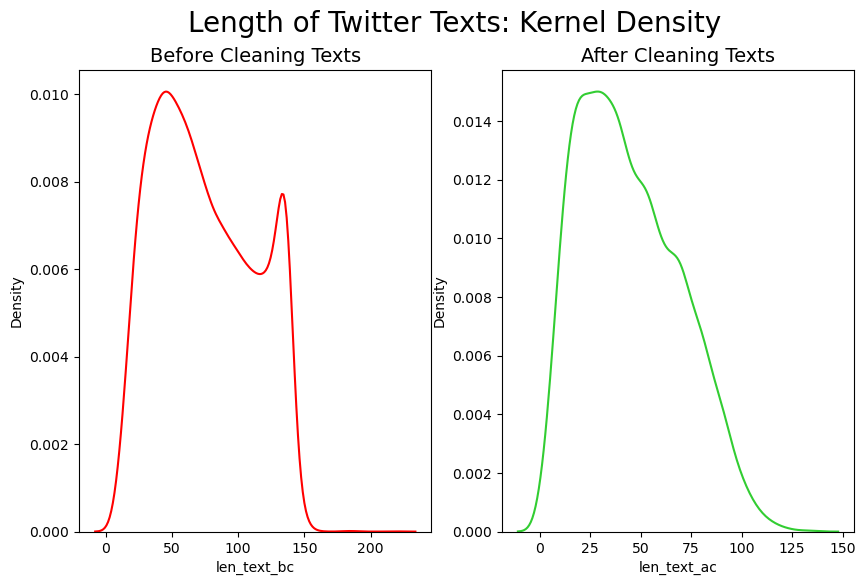

In [8]:
kerneltextlength, axes = plt.subplots(1, 2, figsize = (10, 6))
kerneltextlength.suptitle('Length of Twitter Texts: Kernel Density', fontsize= 20)

# Kernel density before cleaning text
sns.kdeplot(ax = axes[0], data = sentiment_data, x = "len_text_bc", color = 'red')
axes[0].set_title("Before Cleaning Texts", fontsize = 14)

# Kernel density after cleaning text
sns.kdeplot(ax = axes[1], data = sentiment_data, x = "len_text_ac", color = 'limegreen')
x = axes[1].set_title("After Cleaning Texts", fontsize = 14)

### 5. Graphically summarize the word count of the text of the tweet

In [9]:
# Adding new columns containing the word count of tweets before and after cleaning
sentiment_data["count_word_bc"] = sentiment_data["text"].str.split().str.len()
sentiment_data["count_word_ac"] = sentiment_data["text_cleaned"].str.split().str.len()

sentiment_data.head()

,polarity,ids,date,flag,user,text,text_cleaned,len_text_bc,len_text_ac,count_word_bc,count_word_ac
246174,0,1982181752,Sun May 31 10:41:31 PDT 2009,NO_QUERY,lissalue,Feels like poop today its really not fun..,Feels like poop today really fun,43,32,8,6
1181792,4,1982149517,Sun May 31 10:37:37 PDT 2009,NO_QUERY,ShannonBaxter,"@MalloryBrasher Aww, I LOVE YOU TOO MALLORY!",Aww I LOVE YOU TOO MALLORY,45,26,7,6
567011,0,2207037832,Wed Jun 17 07:24:02 PDT 2009,NO_QUERY,SotongPrincess,Really gotta sleep early! been oversleeping...,Really gotta sleep early oversleeping,47,37,6,5
1076466,4,1967438518,Fri May 29 19:34:51 PDT 2009,NO_QUERY,SheriRocks,@DMakaGAMBLE,,13,0,1,0
822439,4,1554526627,Sat Apr 18 17:14:19 PDT 2009,NO_QUERY,brinalovesjoe,@officialFrancia lol hi! I love Secret Life. Y...,lol hi I love Secret Life You amazing actress,72,45,12,9


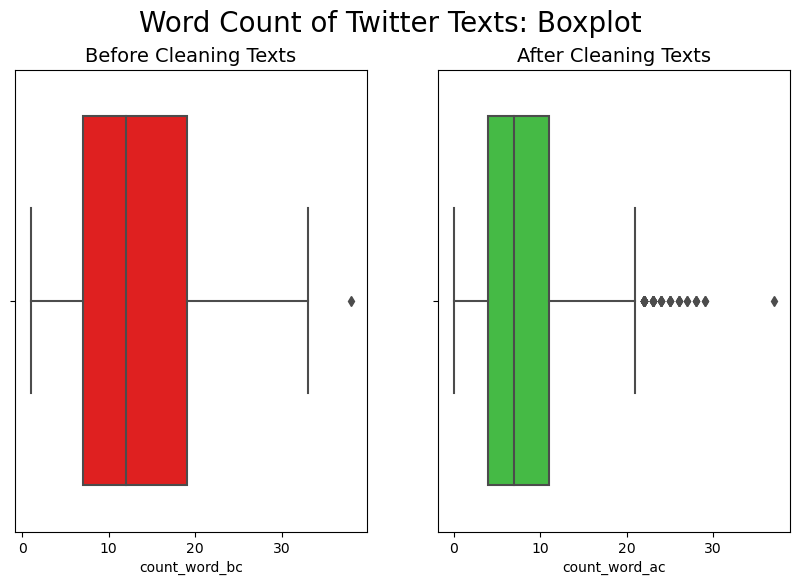

In [10]:
boxtextlength, axes = plt.subplots(1, 2, figsize = (10, 6))
boxtextlength.suptitle('Word Count of Twitter Texts: Boxplot', fontsize= 20)

# Boxplot of word count before cleaning
sns.boxplot(ax = axes[0], x = sentiment_data["count_word_bc"], color = 'red')
axes[0].set_title("Before Cleaning Texts", fontsize= 14)

# Boxplot of word count after cleaning
sns.boxplot(ax = axes[1], x = sentiment_data["count_word_ac"], color = 'limegreen')
x = axes[1].set_title("After Cleaning Texts", fontsize= 14)

/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


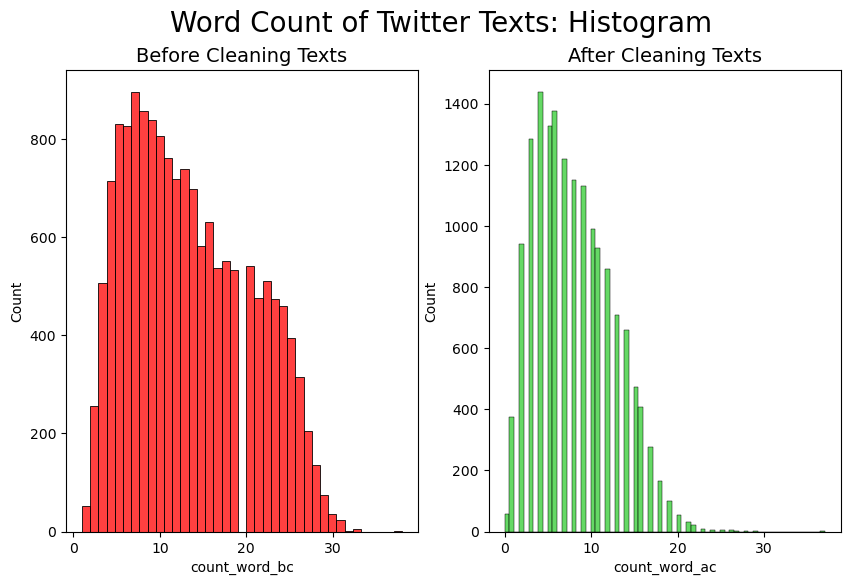

In [11]:
histtextlength, axes = plt.subplots(1, 2, figsize = (10, 6))
histtextlength.suptitle('Word Count of Twitter Texts: Histogram', fontsize= 20)

# Histogram of tweets before cleaning
sns.histplot(ax = axes[0], data = sentiment_data, x = "count_word_bc", color = 'red')
axes[0].set_title("Before Cleaning Texts", fontsize = 14)

# Histogram of tweets after cleaning
sns.histplot(ax = axes[1], data = sentiment_data, x = "count_word_ac", color = 'limegreen')
x = axes[1].set_title("After Cleaning Texts", fontsize = 14)

/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


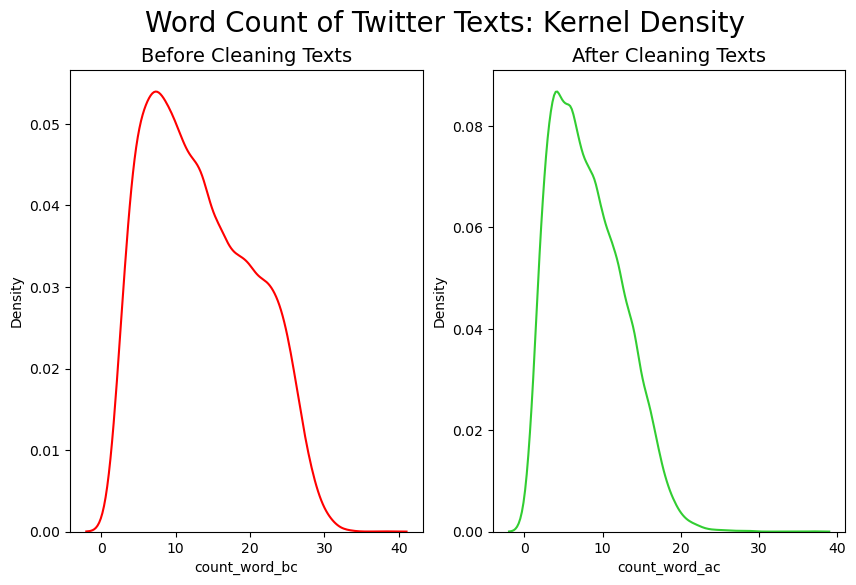

In [12]:
kerneltextlength, axes = plt.subplots(1, 2, figsize = (10, 6))
kerneltextlength.suptitle('Word Count of Twitter Texts: Kernel Density', fontsize= 20)

# Kernel density before cleaning text
sns.kdeplot(ax = axes[0], data = sentiment_data, x = "count_word_bc", color = 'red')
axes[0].set_title("Before Cleaning Texts", fontsize = 14)

# Kernel density after cleaning text
sns.kdeplot(ax = axes[1], data = sentiment_data, x = "count_word_ac", color = 'limegreen')
x = axes[1].set_title("After Cleaning Texts", fontsize = 14)

### 6. Graphically summarize the top 10 bigrams (2-gram) of the tf-idf of the text of the tweet

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function returning the top words
def get_top_tf_idf_words(df = sentiment_data, col = "text", use_idf = True, ngram_range = (2, 2), top_n = 5):
    
    tf_idf = TfidfVectorizer(stop_words='english', ngram_range = ngram_range, use_idf = use_idf)
    # Fit and transform the corpus
    X_sparse_matrix = tf_idf.fit_transform(df[col])
    feature_names = np.array(tf_idf.get_feature_names_out())
    # Generate the tf-idf matrix
    tf_idf_sparse_matrix = tf_idf.transform(df[col])
    # Rank the matrix by tf-idf values and return the indices of the top_n values
    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
    
    # Return the feature names and corresponding tf_idf values in a df
    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx],
    })

In [14]:
# Generate top tf-idf words for the texts before and after cleaning
top_n = 10
df_text_bc = get_top_tf_idf_words(df = sentiment_data, col = "text", top_n = top_n)
df_text_ac = get_top_tf_idf_words(df = sentiment_data, col = "text_cleaned", top_n = top_n)

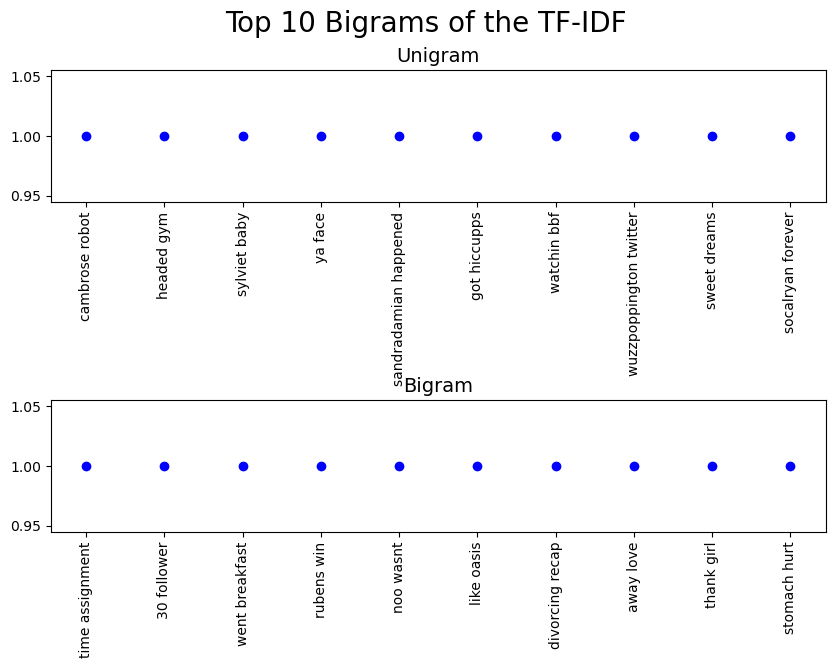

In [17]:
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (10, 6))

fig.suptitle('Top 10 Bigrams of the TF-IDF', fontsize = 20)

# Plot x and tf_idf using blue circle markers
ax[0].plot(x, df_text_bc.tf_idf, 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 14)
# Set number of ticks for x-axis
ax[0].set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = df_text_bc.feature
ax[0].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 10)

# Plot x and tf_idf using blue circle markers
ax[1].plot(x, df_text_ac.tf_idf, 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 14)
# Set number of ticks for x-axis
ax[1].set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = df_text_ac.feature
ax[1].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 10)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()

### 7. Visualize the top 10 term frequency of the tokens associated with negative tweets using scattertext

In [16]:
import scattertext as st
import spacy
from pprint import pprint

# Load the small model of Spacy
nlp = spacy.load("en_core_web_sm")

# Generate corpus before cleaning texts
corpus_bc = st.CorpusFromPandas(sentiment_data, 
                              category_col = 'polarity', 
                              text_col = 'text',
                              nlp = nlp).build()
# Generate corpus after cleaning texts
corpus_ac = st.CorpusFromPandas(sentiment_data, 
                              category_col = 'polarity', 
                              text_col='text_cleaned',
                              nlp = nlp).build()

KeyboardInterrupt: 

In [ ]:
# Create the term frequence for the sentiment before cleaning the texts
term_freq_df_bc = corpus_bc.get_term_freq_df()
# Create the positive score for the sentiment of positive review before cleaning the texts
term_freq_df_bc['positive score'] = corpus_bc.get_scaled_f_scores('4')
# Rank them by descending order
term_freq_df_bc_freq = term_freq_df_bc.sort_values(by = '4 freq', ascending = False)
term_freq_df_bc_Score = term_freq_df_bc.sort_values(by = 'positive score', ascending = False)

# Create the term frequence for the sentiment after cleaning the texts
term_freq_df_ac = corpus_ac.get_term_freq_df()
# Create the positive score for the sentiment of positive review after cleaning the texts
term_freq_df_ac['positive score'] = corpus_ac.get_scaled_f_scores('4')
# Rank them by descending order
term_freq_df_ac_freq = term_freq_df_ac.sort_values(by = '4 freq', ascending = False)
term_freq_df_ac_Score = term_freq_df_ac.sort_values(by = 'positive score', ascending = False)

In [ ]:
# Specify the top n tokens to plot
top_n = 20
term_freq_df_ac_freq = term_freq_df_ac_freq.head(20)
term_freq_df_bc_freq = term_freq_df_bc_freq.head(20)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (10, 6))

fig.suptitle('Top 20 Frequency of Tokens Associated with Positive Tweets', fontsize = 18)

# Plot x and tf using blue circle markers
ax[0].plot(x, term_freq_df_bc_freq["4 freq"], 'bo')
ax[0].set_title('Before Clean the Texts', fontsize = 14)
# Set number of ticks for x-axis
ax[0].set_xticks(x)
# Set ticks labels for x-axis to be the tokens
x_ticks_labels = term_freq_df_bc_freq.index
ax[0].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 12)

# Plot x and tf using blue circle markers
ax[1].plot(x, term_freq_df_ac_freq["4 freq"], 'bo')
ax[1].set_title('After Clean the Texts', fontsize = 14)
# Set number of ticks for x-axis
ax[1].set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = term_freq_df_ac_freq.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize = 12)

# Adjust horizontal space
fig.subplots_adjust(hspace = .5)
plt.show()

### 8. Visualize the top 10 negative scores of the tokens associated with negative tweets using scattertext

In [ ]:
top_n = 20
term_freq_df_ac_Score = term_freq_df_ac_Score.head(20)
term_freq_df_bc_Score = term_freq_df_bc_Score.head(20)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (10, 6))

fig.suptitle('Top 20 Positive Scores of Tokens', fontsize = 20)

# Plot x and scores using blue circle markers
ax[0].plot(x, term_freq_df_bc_Score["positive score"], 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize = 14)
# Set number of ticks for x-axis
ax[0].set_xticks(x)
# Set ticks labels for x-axis to be the tokens
x_ticks_labels = term_freq_df_bc_Score.index
ax[0].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 12)

# Plot x and scores using blue circle markers
ax[1].plot(x, term_freq_df_ac_Score["positive score"], 'bo')
ax[1].set_title(' After Clean the Texts', fontsize = 14)
# Set number of ticks for x-axis
ax[1].set_xticks(x)
# Set ticks labels for x-axis to be the tokens
x_ticks_labels = term_freq_df_ac_Score.index
ax[1].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 12)

# Adjust horizontal space
fig.subplots_adjust(hspace = 1.5)
plt.show()